<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Lab: Exploratory Data Analysis**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis or EDA. 


## Objectives


In this lab, you will perform the following:


- Examine the structure of a dataset.

- Handle missing values effectively.

- Conduct summary statistics on key columns.

- Analyze employment status, job satisfaction, programming language usage, and trends in remote work.


## Hands on Lab


#### Step 1: Install and Import Libraries


Install the necessary libraries for data manipulation and visualization.


In [26]:
#!pip install pandas
#!pip install matplotlib
#!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Step 2: Load and Preview the Dataset
Load the dataset from the provided URL. Use df.head() to display the first few rows to get an overview of the structure.


In [27]:
# Load the Stack Overflow survey dataset
#data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
#I downloaded the dataset on my local machine so that I do not have to wait each time I run the code

import os
data_url = os.path.join(os.getcwd(),"survey_data.csv")

df = pd.read_csv(data_url)

# Set pandas option to display all columns
pd.set_option('display.max_columns', None)

# Display the first few rows of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

#### Step 3: Handling Missing Data


Identify and manage missing values in critical columns such as `Employment`, `JobSat`, and `RemoteWork`. Implement a strategy to fill or drop these values, depending on the significance of the missing data.


In [28]:
## Write your code here
df["Employment"] = df["Employment"].fillna(df["Employment"].mode()[0])
df["JobSat"] = df["JobSat"].fillna(df["JobSat"].mode()[0])
df["RemoteWork"] = df["RemoteWork"].ffill()

#### Step 4: Analysis of Experience and Job Satisfaction


Analyze the relationship between years of professional coding experience (`YearsCodePro`) and job satisfaction (`JobSat`). Summarize `YearsCodePro` and calculate median satisfaction scores based on experience ranges.

- Create experience ranges for `YearsCodePro` (e.g., `0-5`, `5-10`, `10-20`, `>20` years).

- Calculate the median `JobSat` for each range.

- Visualize the relationship using a bar plot or similar visualization.


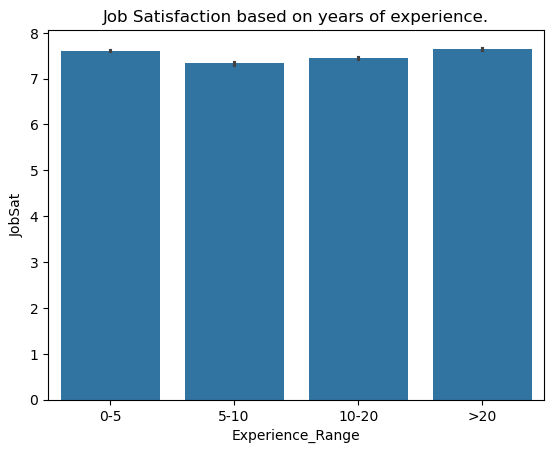

In [29]:
## Write your code here
df["YearsCodePro"] = df["YearsCodePro"].fillna(df["YearsCodePro"].mode()[0])

df["YearsCodePro"] = df["YearsCodePro"].replace({"Less than 1 year": 0,
                                                "More than 50 years": 50})
df["YearsCodePro"] = df["YearsCodePro"].astype("int")


bins = [0,5,10,20,float("inf")]
labels = ["0-5","5-10","10-20",">20"]
df["Experience_Range"] = pd.cut(df["YearsCodePro"], bins = bins, labels= labels, right = False)


df_relationship = df[["Experience_Range","JobSat"]].set_index("Experience_Range")

median_sat = df_relationship.groupby("Experience_Range", observed= False)["JobSat"].median().reset_index()
median_sat

sns.barplot(data = df_relationship, x = "Experience_Range", y = "JobSat")
plt.title("Job Satisfaction based on years of experience.")
plt.show()

#### Step 5: Visualize Job Satisfaction


Use a count plot to show the distribution of `JobSat` values. This provides insights into the overall satisfaction levels of respondents.


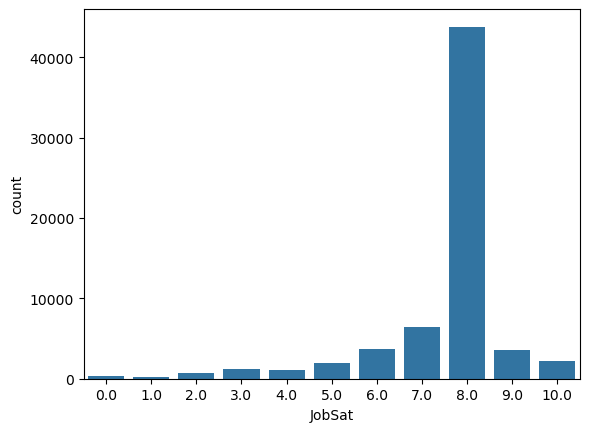

In [30]:
## Write your code here
sns.countplot(data = df, x = df["JobSat"])
plt.show()

#### Step 6: Analyzing Remote Work Preferences by Job Role


Analyze trends in remote work based on job roles. Use the `RemoteWork` and `Employment` columns to explore preferences and examine if specific job roles prefer remote work more than others.

- Use a count plot to show remote work distribution.

- Cross-tabulate remote work preferences by employment type (e.g., full-time, part-time) and job roles.


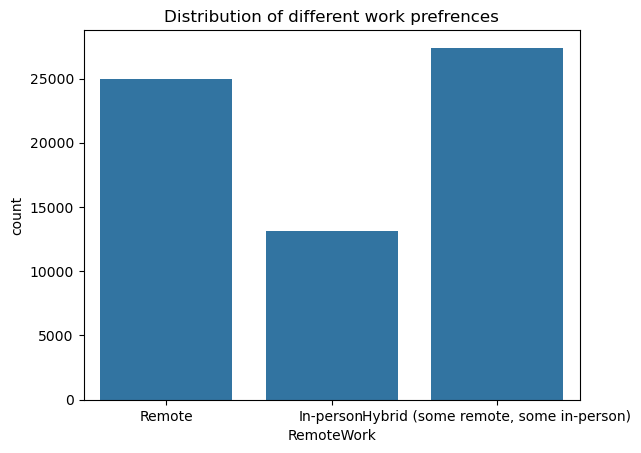

RemoteWork                                                            Hybrid (some remote, some in-person)  \
Employment                             DevType                                                               
Employed, full-time                    Academic researcher                                             324   
                                       Blockchain                                                       17   
                                       Cloud infrastructure engineer                                   220   
                                       Data engineer                                                   430   
                                       Data or business analyst                                        178   
...                                                                                                    ...   
Student, part-time;Employed, part-time System administrator                                              4   
Student, part-time;Retired             Developer, full-stack                                             1   
                                       Security professional                                             0   
                                       Student                                                           0   
All                                                                                                  27398   

RemoteWork                                                            In-person  \
Employment                             DevType                                    
Employed, full-time                    Academic researcher                  209   
                                       Blockchain                            14   
                                       Cloud infrastructure engineer         42   
                                       Data engineer                        110   
                                       Data or business analyst              96   
...                                                                         ...   
Student, part-time;Employed, part-time System administrator                   4   
Student, part-time;Retired             Developer, full-stack                  0   
                                       Security professional                  0   
                                       Student                                0   
All                                                                       13095   

RemoteWork                                                            Remote  \
Employment                             DevType                                 
Employed, full-time                    Academic researcher                43   
                                       Blockchain                         66   
                                       Cloud infrastructure engineer     216   
                                       Data engineer                     297   
                                       Data or business analyst           77   
...                                                                      ...   
Student, part-time;Employed, part-time System administrator                0   
Student, part-time;Retired             Developer, full-stack               1   
                                       Security professional               1   
                                       Student                             1   
All                                                                    24944   

RemoteWork                                                              All  
Employment                             DevType                               
Employed, full-time                    Academic researcher              576  
                                       Blockchain                        97  
                                       Cloud infrastructure engineer    478  
                                       Data engineer      

In [31]:
## Write your code here
sns.countplot(data = df, x = df["RemoteWork"])
plt.title("Distribution of different work prefrences")
plt.show()

df["DevType"] = df["DevType"].fillna(df["DevType"].mode()[0])
cross_tab = pd.crosstab(index=[df['Employment'], df['DevType']], columns=df['RemoteWork'], margins=True)

cross_tab

#### Step 7: Analyzing Programming Language Trends by Region


Analyze the popularity of programming languages by region. Use the `LanguageHaveWorkedWith` column to investigate which languages are most used in different regions.

- Filter data by country or region.

- Visualize the top programming languages by region with a bar plot or heatmap.


/tmp/ipykernel_20591/446380320.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=languages_country, x="Count", y="LanguageHaveWorkedWith", palette="viridis")


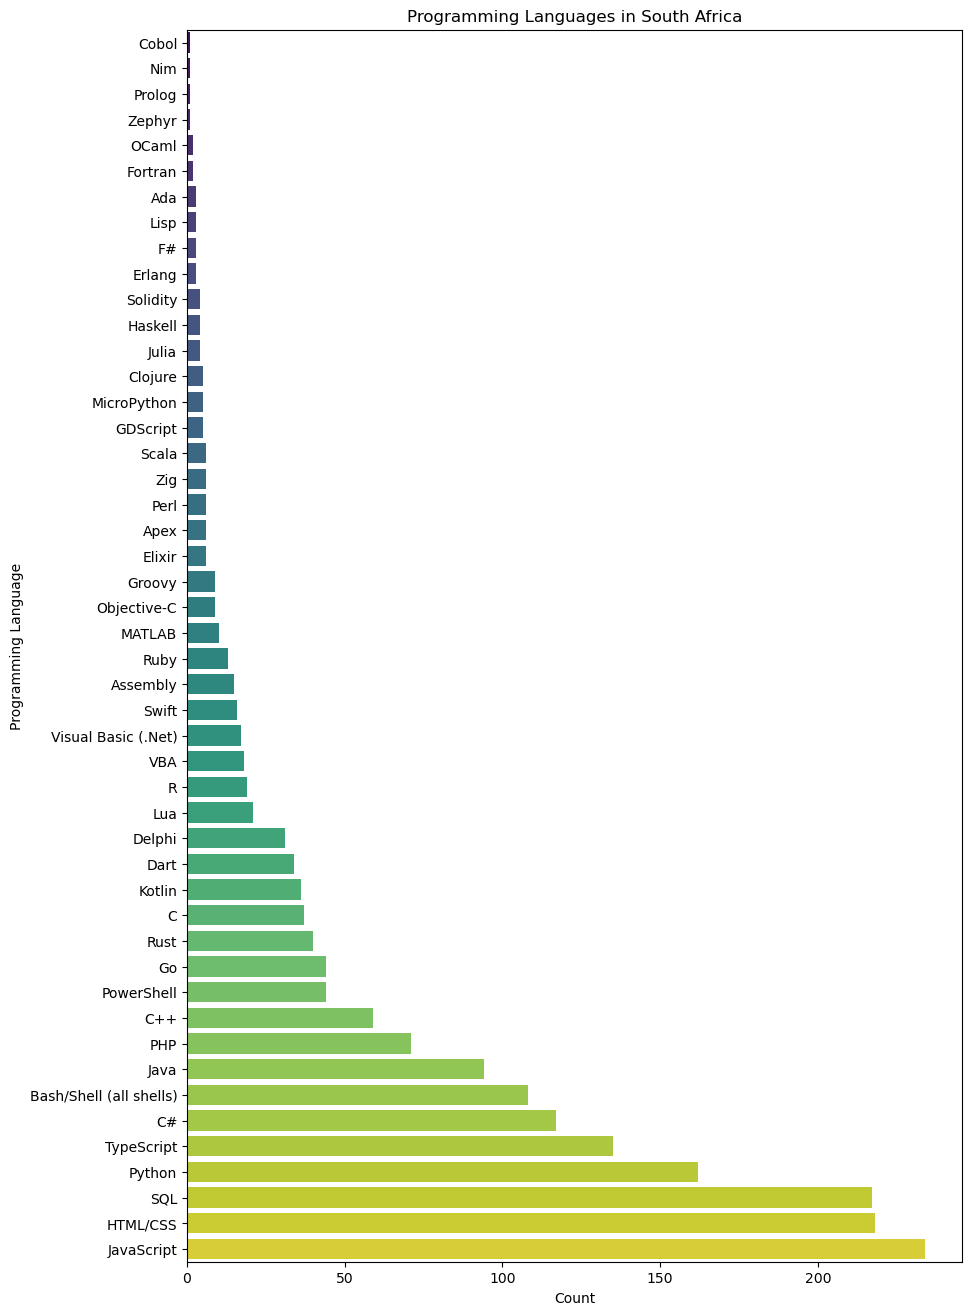

In [81]:
## Write your code here
df["LanguageHaveWorkedWith"] = df["LanguageHaveWorkedWith"].fillna(df["LanguageHaveWorkedWith"].mode()[0])
df["Country"] = df["Country"].fillna(df["Country"].mode()[0])


#Split the `LanguageHaveWorkedWith` column into individual languages
df_languages = df.assign(LanguageHaveWorkedWith=df["LanguageHaveWorkedWith"].str.split(";")).explode("LanguageHaveWorkedWith")

#Group by country and count language frequencies
language_counts = df_languages.groupby(["Country", "LanguageHaveWorkedWith"]).size().reset_index(name="Count").sort_values("Count" ,ascending= True)


#Bar plot for a specific country (e.g., South Africa)
country = "South Africa"
languages_country = language_counts[language_counts["Country"] == country]

plt.figure(figsize=(10, 16))
sns.barplot(data=languages_country, x="Count", y="LanguageHaveWorkedWith", palette="viridis")
plt.title(f"Programming Languages in {country}")
plt.xlabel("Count")
plt.ylabel("Programming Language")
plt.show()



#### Step 8: Correlation Between Experience and Satisfaction


Examine how years of experience (`YearsCodePro`) correlate with job satisfaction (`JobSatPoints_1`). Use a scatter plot to visualize this relationship.


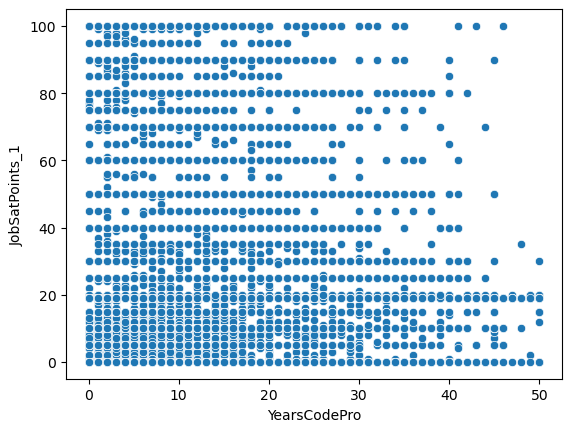

In [ ]:
## Write your code here
df["JobSatPoints_1"] = df["JobSatPoints_1"].fillna(round(df["JobSatPoints_1"].mean()))

df_relationship = df[["YearsCodePro","JobSatPoints_1"]]

sns.scatterplot(df_relationship, x = "YearsCodePro", y = "JobSatPoints_1")
plt.show()

#Conclution: There is no correlation

#### Step 9: Educational Background and Employment Type


Explore how educational background (`EdLevel`) relates to employment type (`Employment`). Use cross-tabulation and visualizations to understand if higher education correlates with specific employment types.


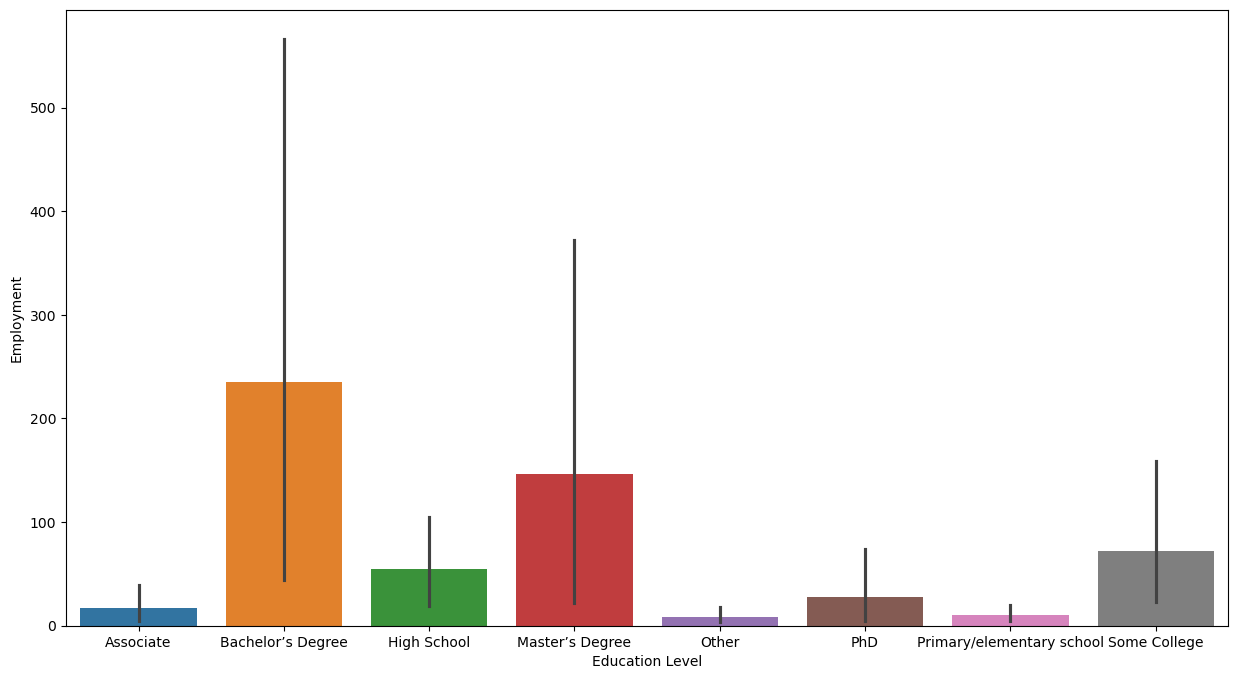

In [108]:
## Write your code here
df["EdLevel"] = df["EdLevel"].fillna(df["EdLevel"].mode())

mapping = {
    "Bachelor’s degree (B.A., B.S., B.Eng., etc.)": 'Bachelor’s Degree',
    "Master’s degree (M.A., M.S., M.Eng., MBA, etc.)": 'Master’s Degree',
    "Some college/university study without earning a degree": 'Some College',
    "Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)": 'High School',
    "Professional degree (JD, MD, Ph.D, Ed.D, etc.)": 'PhD',
    "Associate degree (A.A., A.S., etc.)": 'Associate',
    "Something else": 'Other'
}

df["EdLevel"] = df["EdLevel"].replace(mapping)


cross_tab = pd.crosstab(columns = df["EdLevel"], index= df["Employment"])
cross_tab

plt.figure(figsize=(15,8))
sns.barplot(data = cross_tab)
plt.xlabel("Education Level")
plt.ylabel("Employment")
plt.show()

#### Step 10: Save the Cleaned and Analyzed Dataset


After your analysis, save the modified dataset for further use or sharing.


In [111]:
## Write your code here
path = os.path.join(os.getcwd(),"survey_data_mod.csv")
df.to_csv(path)

<h2>Summary</h2>


In this revised lab, you:

- Loaded and explored the structure of the dataset.

- Handled missing data effectively.

- Analyzed key variables, including working hours, job satisfaction, and remote work trends.

- Investigated programming language usage by region and examined the relationship between experience and satisfaction.

- Used cross-tabulation to understand educational background and employment type.


Copyright © IBM Corporation. All rights reserved.
